# Relativistic Corrections to Power Spectrum Multipoles

We consider relativistic corrections to the power spectrum multipoles as constrained by luminosity function results, and compare it to other effects such as redshift-space distortions (RSD) and scale-dependent linear bias from local primordial non-Gaussianity $f_\mathrm{NL}$ (PNG).

In [1]:
import corner
import h5py as hp
import matplotlib.pyplot as plt
import numpy as np

from conf import PATHOUT
from horizonground.clustering_modification import (
    non_gaussianity_factor,
    relativistic_factor,
    standard_kaiser_factor,
)

We set the fiducial redshift and scale-independent linear tracer bias. We also set the $f_\mathrm{NL}$ value and the tracer-dependent parameter in scale-dependent linear bias due to PNG.

In [2]:
FIDUCIAL_REDSHIFT = 2.
FIDUCIAL_LINEAR_BIAS = 2.
FIDUCIAL_NON_GAUSSNIANTY = 1.
TRACER_P = 1.6

We will investigate the monopole and quadrupole at the following wavenumbers.

In [3]:
multipole_orders = [0, 2]
wavenumbers = np.logspace(-3.5, -1.5, num=200+1)

The already sampled relativistic correction values are imported.

In [4]:
relativistic_correction_sample_file = PATHOUT/"decabinet"/(
    "relcrct_z2._eBOSS_QSO_LF_PLE_zeus_1512631_32_5E5_by1.h5"
)

with hp.File(relativistic_correction_sample_file, 'r') as relcrct_data:
    correction_samples = relcrct_data['distill/chain'][()]
    
correction_estimates = corner.quantile(correction_samples, [0.1587, 0.5, 0.8413])

We now compute RSD and PNG results for comparison.

In [5]:
RSD_modification = {
    ell: standard_kaiser_factor(ell, FIDUCIAL_LINEAR_BIAS, FIDUCIAL_REDSHIFT) * np.ones_like(wavenumbers)
    for ell in multipole_orders
}

In [6]:
PNG_modification = {
    ell: non_gaussianity_factor(
        wavenumbers, ell,
        FIDUCIAL_NON_GAUSSNIANTY, FIDUCIAL_LINEAR_BIAS, FIDUCIAL_REDSHIFT, tracer_param=TRACER_P
    )
    for ell in multipole_orders   
}

We now show the amount of modification relative to the standard Kaiser power spectrum multipoles.

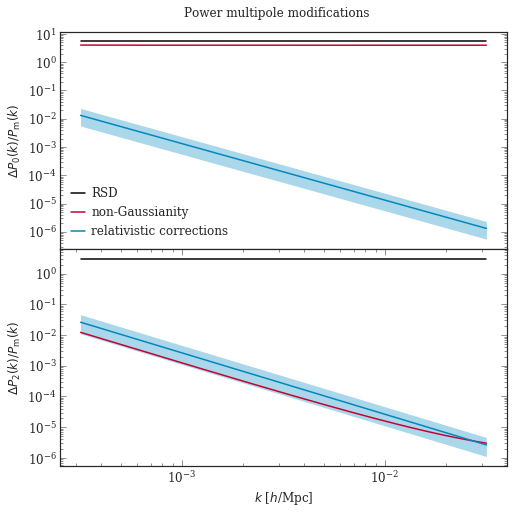

In [7]:
plt.close('all')
plt.figure(figsize=(8, 8))

monopole = plt.subplot2grid((2, 1), (0, 0))

monopole.loglog(wavenumbers, RSD_modification[0] * np.ones_like(wavenumbers), label="RSD")
monopole.loglog(wavenumbers, PNG_modification[0], label="non-Gaussianity")

key_line = monopole.loglog(
    wavenumbers,
    relativistic_factor(wavenumbers, 0, FIDUCIAL_REDSHIFT, correction_value=correction_estimates[1]),
    label="relativistic corrections"
)
monopole.fill_between(
    wavenumbers,
    relativistic_factor(wavenumbers, 0, FIDUCIAL_REDSHIFT, correction_value=correction_estimates[0]),
    relativistic_factor(wavenumbers, 0, FIDUCIAL_REDSHIFT, correction_value=correction_estimates[-1]),
    color=key_line[0].get_color(), linewidth=0., alpha=1./3.
)
    
monopole.get_xaxis().set_visible(False)
monopole.set_ylabel(r"$\Delta P_0(k) / P_\mathrm{m}(k)$")

monopole.legend(handlelength=1.2, handletextpad=0.5)

quadrupole = plt.subplot2grid((2, 1), (1, 0), sharex=monopole)

quadrupole.loglog(wavenumbers, RSD_modification[2] * np.ones_like(wavenumbers))
quadrupole.loglog(wavenumbers, PNG_modification[2])

key_line = quadrupole.loglog(
    wavenumbers,
    relativistic_factor(wavenumbers, 2, FIDUCIAL_REDSHIFT, correction_value=correction_estimates[1])
)

quadrupole.fill_between(
    wavenumbers,
    relativistic_factor(wavenumbers, 2, FIDUCIAL_REDSHIFT, correction_value=correction_estimates[0]),
    relativistic_factor(wavenumbers, 2, FIDUCIAL_REDSHIFT, correction_value=correction_estimates[-1]),
    color=key_line[0].get_color(), linewidth=0., alpha=1./3.
)

quadrupole.set_xlabel(r"$k$ [$h$/Mpc]")
quadrupole.set_ylabel(r"$\Delta P_2(k) / P_\mathrm{m}(k)$")

plt.suptitle("Power multipole modifications", verticalalignment='bottom', y=0.9)
plt.subplots_adjust(wspace=0, hspace=0)